# Hacktiv8-PTP Python For Data Science // S.15 // Model Deployment




## Introduction


Data scientist sering kali harus menyampaikan hasil kepada orang lain. Dalam beberapa kasus, supervisor/atasan mungkin ingin melihat beberapa angka atau kita harus menuliskan main insights dari beberapa pekerjaan. Ini cukup mudah - kita hanya copy dan paste ke email atau dokumen Latex. Tetapi bagaimana jika kita ingin mengirim seseorang model sebenarnya yang telah kita latih, sehingga mereka dapat mengevaluasi atau menggunakannya? Jika orang yang dimaksud cukup teknis, maka kita bisa menyimpan model ke disk dan kirim via email, bersama dengan beberapa notebook Jupyter.

Tetapi bagaimana jika kita ingin seseorang di bagian marketing mencoba sebuah model, atau kita ingin membagikannya dengan teman-teman yang mungkin menganggapnya menarik? Dalam kasus ini, kita harus membuat kode kita dapat diakses oleh mereka dengan cara yang mereka kenal.

Tiga bagian dari sesi ini adalah:

- Creating a simple model that can be deployed to the web, where users can input variables to get predictions.
- Building the components needed by Flask microframework to create a web app.
- Deploying the final web app using the Heroku platform.

## Creating Model for Deployment


Kita dapat menerapkan dari model yang kita buat sebelumnya; atau jika kita menginginkan model baru, ikuti langkah di bawah ini. Ambil data yang digunakan dari sini.

Dataset tersebut terdiri dari data penempatan siswa di kampus XYZ. Mencakup secondary dan higher secondary school percentage dan specialization. Ini juga mencakup degree specialization, type dan Work experience dan tawaran salary kepada siswa yang ditempatkan.



## Importing Libraries



Notes: Profiling boleh diinstall atau tidak diinstall. Dalam sesi ini, profiling hanya digunakan menjadi contoh untuk memudahkan analisa.

Lewati cell report = data.profile_report(title='Campus Placement Data - Report', progress_bar=False) Jika memutuskan untuk tidak menggunakan profiling.



In [1]:
pip install pandas_profiling


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=1a12e98b5763372e4676d3698e790145ff70bd6410d487783a8ce0e15f7acde8
  Stored in directory: c:\users\aminf\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=a9ee1a4f6ec308257bdee273cd70ff6fc0f2ee591a06f636dd57f7687376e1e1
  Stored in directory: c:\users\aminf\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/iketutg/my_example_ds/main/data/Placement_Data_Full_Class.csv')
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)

Examining Dataset


In [5]:
data.head()


,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Kesimpulan

- Kami memiliki data kualifikasi Gender dan Pendidikan
- Kami memiliki semua data kinerja (skor) pendidikan
- Kami memiliki status penempatan dan detail gaji
- Kita dapat mengharapkan nilai nol dalam gaji karena kandidat yang tidak ditempatkan tidak akan memiliki gaji
- Status penempatan adalah variabel target kami sisanya adalah variabel independen kecuali gaji

In [6]:
print ("The shape of the  data is (row, column):"+ str(data.shape))
print (data.info())

The shape of the  data is (row, column):(215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [7]:
report = data.profile_report(title="campus report", progress_bar=False)

In [8]:
report = data.profile_report(title='Campus Placement Data - Report',progress_bar=False)
report

# Uncomment syntax below to make new html file

# report.to_file(output_file='output.html')

- 67 Nilai yang hilang dalam Gaji untuk siswa yang tidak ditempatkan. Nilai NaN perlu diisi.
- Data tidak diskalakan. Kolom gaji berkisar antara 200k-940k, kolom numerik lainnya adalah persentase.
- 300k pada Persentil ke-75 berjalan hingga maks 940k, dalam Gaji (skewnwss tinggi). Dengan demikian, outlier pada akhir gaji tinggi.

Data Cleaning / Handling missing values


In [9]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',
      data['salary'].isnull().sum(), sep = '\n')


Salary column with null values:
0


Exploring Data by each Features (Optional)


In [10]:
"""
Feature: Gender

Does gender affect placements?
"""

data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

C:\Users\aminf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


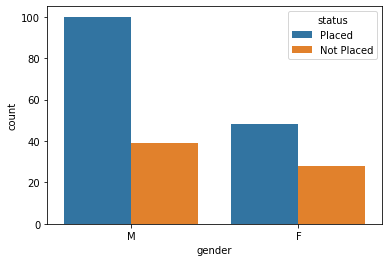

In [11]:
sns.countplot("gender", hue="status", data=data)
plt.show()

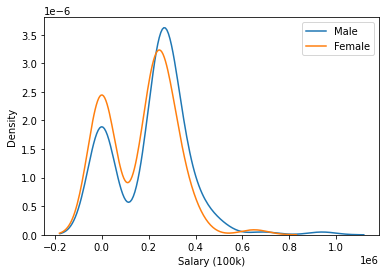

In [12]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

C:\Users\aminf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


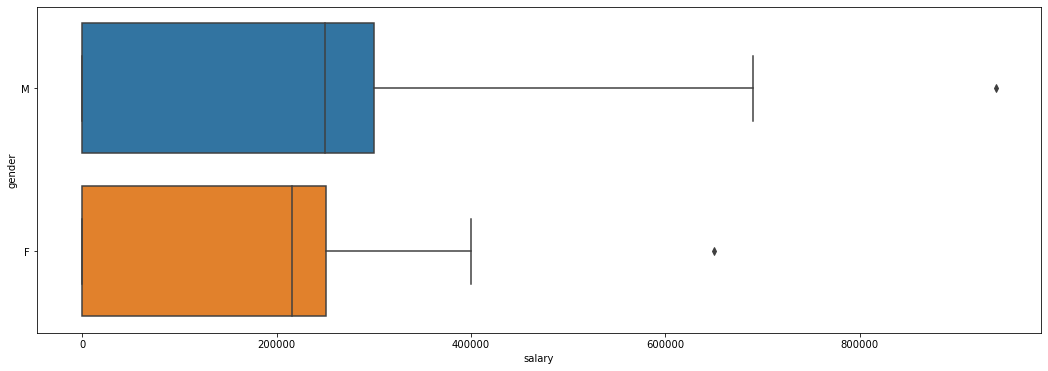

In [13]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

Wawasan

- Kami memiliki sampel 139 siswa laki-laki dan 76 siswa perempuan.
- 30 siswa perempuan dan 40 siswa laki-laki tidak ditempatkan. - - Siswa laki-laki memiliki penempatan yang relatif lebih tinggi.
- Siswa laki-laki ditawari gaji yang sedi

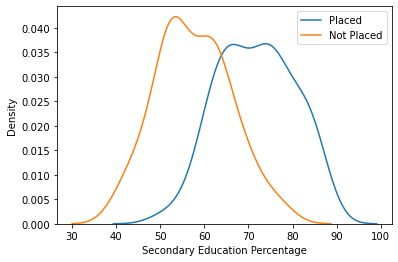

In [14]:
"""
Feature: ssc_p (Secondary Education percentage), ssc_b (Board Of Education)

Does Secondary Education affect placements?
"""
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

- Semua siswa dengan Persentase Pendidikan Menengah di atas 90% ditempatkan
- Semua siswa dengan Persentase Pendidikan Menengah di bawah 50% tidak ditempatkan
- Siswa dengan Persentase Pendidikan Menengah yang baik ditempatkan rata-rata.

C:\Users\aminf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


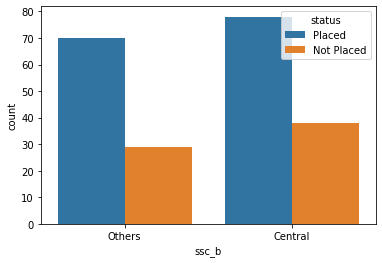

In [15]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()


Board Of Education tidak banyak mempengaruhi Placement Status.



C:\Users\aminf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


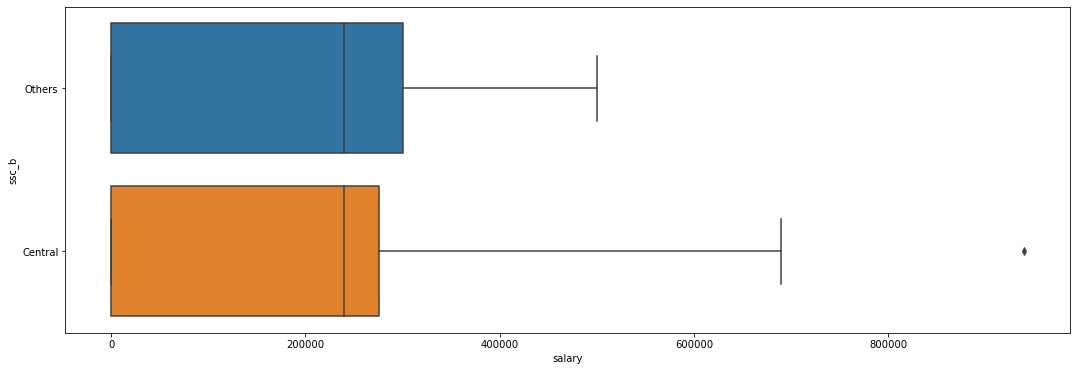

In [16]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

Outliers terdapat pada keduanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi.



C:\Users\aminf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


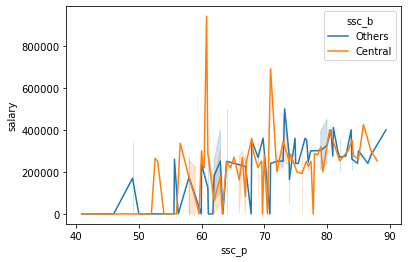

In [17]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education Tidak Mempengaruhi Gaji

Kita dapat membuat grafik sendiri dari sini.

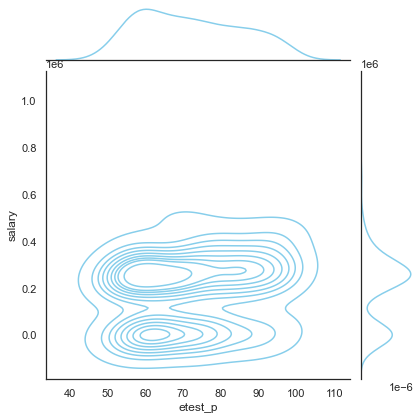

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

- Sebagian besar kandidat yang mendapat skor sekitar 60 persen mendapat paket yang layak sekitar 3 lakh PA
- Tidak banyak kandidat yang menerima gaji lebih dari 4 lakh PA
- Bagian padat bawah menunjukkan kandidat yang tidak ditempatkan

C:\Users\aminf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aminf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aminf\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

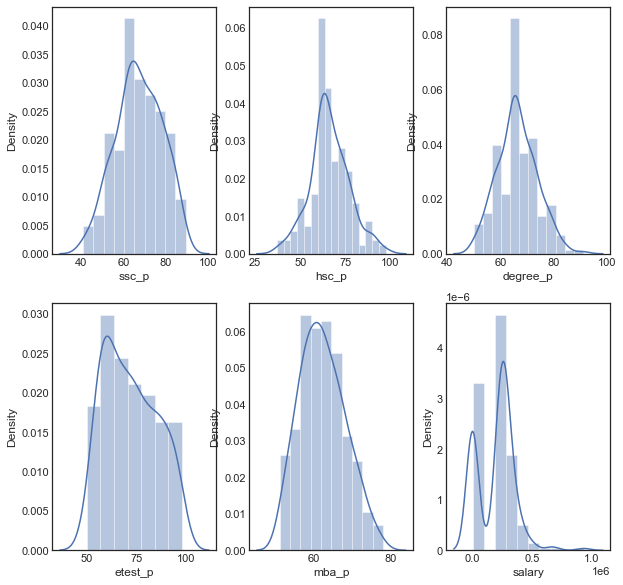

In [19]:
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

- Semua distribusi mengikuti distribusi normal kecuali fitur gaji
- Sebagian besar kinerja pendidikan calon adalah antara 60-80%
- Distribusi gaji mendapat outlier dimana hanya sedikit yang mendapat gaji 7,5L dan 10L PA

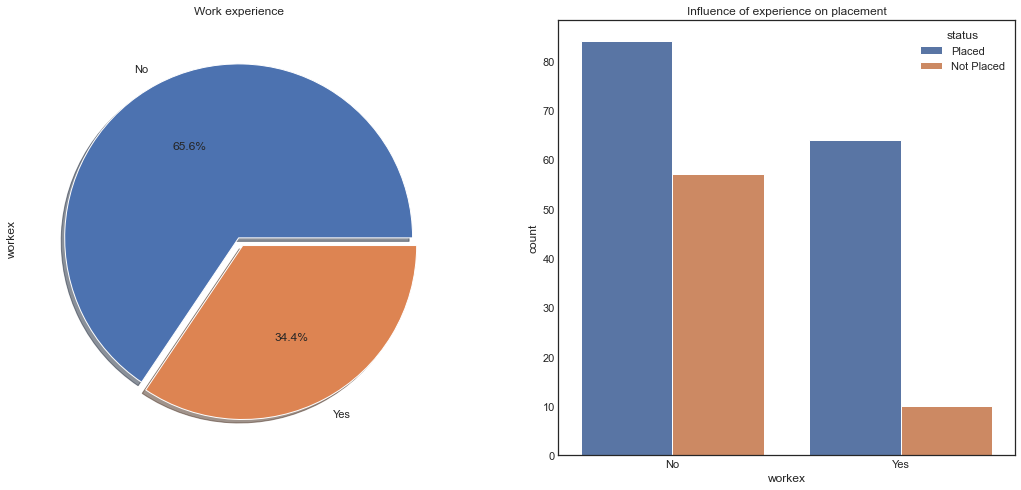

In [20]:
plt.style.use('seaborn-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = data)
ax[1].set_title('Influence of experience on placement')

plt.show()

- Kami memiliki hampir 66,2% kandidat yang tidak pernah memiliki pengalaman kerja
- Kandidat yang tidak pernah memiliki pengalaman kerja lebih banyak dipekerjakan daripada yang memiliki pengalaman
- Kita dapat menyimpulkan bahwa pengalaman kerja tidak mempengaruhi kandidat dalam proses rekrutmen

## Preprocessing data for classfication models


In [21]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=e36ded40ab273cab1ddc29bece2689e5ed30392f4c9110cab05e2ed92f7a3125
  Stored in directory: c:\users\aminf\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender','workex','specialisation','status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [23]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [25]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [26]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8307692307692308
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.87      0.89      0.88        45

    accuracy                           0.83        65
   macro avg       0.80      0.79      0.80        65
weighted avg       0.83      0.83      0.83        65



In [27]:
X_test

,ssc_p,hsc_p,degree_p,etest_p
34,62.00,51.0,52.00,68.44
207,83.33,78.0,61.00,88.56
111,51.00,54.0,61.00,60.00
18,63.00,66.0,64.00,68.00
92,60.23,69.0,66.00,72.00
...,...,...,...,...
93,52.00,62.0,54.00,72.00
16,63.00,66.2,65.60,60.00
19,60.00,67.0,70.00,50.48
2,65.00,68.0,64.00,75.00


In [28]:
#Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [29]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



# Getting ready for deployment


## Pickle

Modul pickle Python digunakan untuk serializing dan de-serializing struktur objek Python. Objek apa pun dengan Python dapat dibuat pickled sehingga dapat disimpan di disk. Apa yang dilakukan pickle adalah 'serializes' objek terlebih dahulu sebelum menulisnya ke file. Pickling adalah cara untuk mengubah objek python (list, dict, etc.) Menjadi character stream. Idenya adalah bahwa character stream ini berisi semua informasi yang diperlukan untuk merekonstruksi objek dalam skrip python lain.



In [30]:
pickle.dump(random_forest, open('model_classifier.pkl','wb'))


## Brief introduction to HTML and CSS


HTML adalah standard markup language untuk membuat halaman Web.



## What is HTML?
- HTML stands for Hyper Text Markup Language
- HTML is the standard markup language for creating Web pages
- HTML describes the structure of a Web page
- HTML consists of a series of elements
- HTML elements tell the browser how to display the content
- HTML elements label pieces of content such as "this is a heading", "this is a paragraph", "this is a link", etc.

## A Simple HTML Document


```
<!DOCTYPE html>
<html>
<head>
  <title>Page Title</title>
</head>
<body>

  <h1>My First Heading</h1>
  <p>My first paragraph.</p>

</body>
</html>
```

- ```<!DOCTYPE html>``` mendefinisikan bahwa dokumen ini adalah dokumen HTML5
- ```<html>``` elemen adalah elemen root dari halaman HTML
- ```<head>``` elemen berisi informasi meta tentang halaman HTML
- ```<title>``` elemen menentukan judul untuk halaman HTML (yang ditampilkan di judul browser atau di tab halaman)
- ```<body>``` elemen mendefinisikan badan dokumen, dan merupakan wadah untuk semua konten yang terlihat, seperti headings, paragraphs, images, hyperlinks, tables, lists, dll.
- ```<h1>``` elemen mendefinisikan headingbesar
- The ```<p>``` element mendefinisikan sebuah paragraph

## What is an HTML Element?


Elemen HTML ditentukan oleh tag awal, beberapa konten, dan tag akhir:

```<tagname>Content goes here...</tagname>```

Elemen HTML adalah apapun yang dimulai dari tag awal hingga tag akhir:

```
<h1>My First Heading</h1>
<p>My first paragraph.</p>
```

CSS adalah singkatan dari Cascading Style Sheets.

CSS menghemat banyak pekerjaan. CSS dapat mengontrol tata letak beberapa halaman web sekaligus.

## What is CSS?


Cascading Style Sheets (CSS) digunakan untuk memformat tata letak halaman web.

Dengan CSS, kita dapat mengontrol warna, font, ukuran teks, jarak antar elemen, bagaimana elemen diposisikan dan ditata, gambar latar belakang atau warna latar yang akan digunakan, tampilan yang berbeda untuk perangkat dan ukuran layar yang berbeda, dan banyak lagi.

## CSS Syntax


Set aturan CSS terdiri dari selector dan declaration block:



<img src="https://i.ibb.co/zbJTWJ3/css.gif" width="500" align="center">


- The selector points to the HTML element you want to style.
- The declaration block contains one or more declarations separated by semicolons.
- Each declaration includes a CSS property name and a value, separated by a colon.
- Multiple CSS declarations are separated with semicolons, and declaration blocks are surrounded by curly braces.

## Using CSS


CSS dapat ditambahkan ke dokumen HTML dengan 3 cara:

CSS dapat ditambahkan ke dokumen HTML dengan 3 cara:

- Inline - by using the style attribute inside HTML elements
- Internal - by using a ```<style>``` element in the ```<head>``` section
- External - by using a ```<link>``` element to link to an external CSS file

Cara paling umum untuk menambahkan CSS, adalah menempatkan style dalam file CSS eksternal.

## Inline CSS
Inline CSS digunakan untuk menerapkan style unik ke satu elemen HTML.

Inline CSS menggunakan style attribute dari elemen HTML.

Contoh berikut bagaimana cara mengatur warna teks elemen ```<h1>``` menjadi biru, dan warna teks elemen ```<p>`` menjadi merah:

```
<h1 style="color:blue;">A Blue Heading</h1>

<p style="color:red;">A red paragraph.</p>
```


## Internal CSS

CSS internal digunakan untuk menentukan style untuk satu halaman HTML.

CSS internal ditentukan di bagian <head> halaman HTML, dalam elemen <style>.

Contoh berikut mengatur warna teks SEMUA elemen <h1> (pada halaman itu) menjadi biru, dan warna teks SEMUA elemen <p> menjadi merah. Selain itu, halaman akan ditampilkan dengan warna latar belakang "powderblue":

```
<!DOCTYPE html>
<html>
<head>
<style>
  body {background-color: powderblue;}
  h1   {color: blue;}
  p    {color: red;}
</style>
</head>
<body>

  <h1>This is a heading</h1>
  <p>This is a paragraph.</p>

</body>
</html>
```

## External CSS
Style sheet eksternal digunakan untuk menentukan style untuk banyak halaman HTML.

Untuk menggunakan style sheet eksternal, tambahkan link ke dalamnya di bagian <head> pada setiap halaman HTML:

```
<!DOCTYPE html>
<html>
<head>
  <link rel="stylesheet" href="styles.css">
</head>
<body>

  <h1>This is a heading</h1>
  <p>This is a paragraph.</p>

</body>
</html>
```

Style sheet eksternal dapat ditulis di editor teks manapun. File tidak boleh berisi kode HTML apa pun, dan harus disimpan dengan ekstensi .css.

Berikut adalah tampilan file styles.css:

```
body {
  background-color: powderblue;
}
h1 {
  color: blue;
}
p {
  color: red;
}
```

# Creating web app with Flask

Pastikan flask sudah terinstall dengan ```pip install flask```.

Minimal Flask application terlihat seperti ini:

In [31]:
from flask import Flask
app = Flask(__name__)

@app.route('/')
def hello_world():
    return 'Hello, World!'

Jadi apa yang dilakukan kode tersebut?

- Pertama kita mengimpor kelas Flask. Instance dari kelas ini adalah aplikasi WSGI kita.
- Selanjutnya kita membuat instance dari kelas ini. Argumen pertama adalah nama modul atau paket aplikasi. Jika kita menggunakan satu modul (seperti dalam contoh ini), kita harus menggunakan __name__ karena bergantung pada apakah aplikasi tersebut dimulai sebagai aplikasi atau diimpor sebagai modul, namanya akan berbeda ('__main__' versus nama impor sebenarnya). Ini diperlukan agar Flask tahu di mana mencari templates, static files, dan lain-lain.
- Kita kemudian menggunakan dekorator route() untuk memberi tahu Flask, URL apa yang harus mentrigger fungsi kita.
- Fungsi tersebut diberi nama yang juga digunakan untuk menghasilkan URL untuk fungsi tertentu itu, dan mengembalikan pesan yang ingin kita tampilkan di browser pengguna.

Simpan sebagai hello.py atau yang serupa. Pastikan untuk tidak memanggil aplikasi kita flask.py karena ini akan conflict dengan Flask itu sendiri.

Untuk menjalankan aplikasi, kita dapat menggunakan perintah flask atau switch -m python dengan Flask. Sebelum kita dapat melakukannya, kita perlu memberi tahu terminal tentang aplikasi yang akan digunakan dengan mengekspor FLASK_APP environment variable:

```
$ export FLASK_APP=hello.py
$ flask run
 * Running on http://127.0.0.1:5000/

```

## melalui command prompt / CMD 
set FLASK_APP=hello
flask run 

##  PowerShell 
$env:FLASK_APP="hello"
flask run 

Command ini meluncurkan server bawaan yang sangat sederhana, yang cukup baik untuk testingtetapi mungkin bukan yang ingin Anda gunakan dalam production.

Sekarang akses ke http://127.0.0.1:5000/, dan kita akan melihat hello world.



## Debug Mode


Script flask sangat bagus untuk memulai server local development, tetapi kita harus merestart secara manual setelah setiap perubahan pada kode kita. Hal itu tidak bagus dan Flask bisa melakukannya dengan lebih baik. Jika kita mengaktifkan debug support, server akan merestart dirinya sendiri pada perubahan kode, dan itu juga akan memberi kita debugger yang berguna jika terjadi kesalahan.

Untuk mengaktifkan semua fitur development (termasuk mode debug) kita dapat mengekspor FLASK_ENV environment variable dan menyetelnya ke development sebelum menjalankan server:



```
$ export FLASK_ENV=development
$ flask run
```

(On Windows you need to use set instead of export.)

Hal tersebut melakukan hal-hal berikut:

- it activates the debugger
- it activates the automatic reloader
- it enables the debug mode on the Flask application.

Kita juga dapat mengontrol mode debug secara terpisah dari environment dengan mengekspor FLASK_DEBUG=1.

## Routing


Aplikasi web modern menggunakan URL yang meaningful untuk membantu pengguna. Pengguna lebih cenderung menyukai halaman dan kembali jika halaman tersebut menggunakan URL yang meaningful yang dapat mereka ingat dan gunakan untuk mengunjungi halaman secara langsung.

Gunakan dekorator route() untuk mengikat fungsi ke URL.



In [32]:
@app.route('/')
def index():
    return 'Index Page'

@app.route('/hello')
def hello():
    return 'Hello, World'


## Variable Rules


Kita dapat menambahkan bagian variabel ke URL dengan menandai bagian dengan <variable_name>. Fungsi kita kemudian menerima masukan sebagai keyword argument. Secara opsional, kita  bisa menggunakan konverter untuk menentukan tipe argumen seperti <converter:variable_name>.



In [33]:
from markupsafe import escape

@app.route('/user/<username>')
def show_user_profile(username):
    # show the user profile for that user
    return 'User %s' % escape(username)

@app.route('/post/<int:post_id>')
def show_post(post_id):
    # show the post with the given id, the id is an integer
    return 'Post %d' % post_id

@app.route('/path/<path:subpath>')
def show_subpath(subpath):
    # show the subpath after /path/
    return 'Subpath %s' % escape(subpath)

## HTTP Methods


Aplikasi web menggunakan metode HTTP yang berbeda saat mengakses URL. Kita harus membiasakan diri dengan metode HTTP saat kita bekerja dengan Flask. Secara default, route hanya menjawab permintaan GET . Kita bisa menggunakan argumen metode dekorator route()  untuk menangani metode HTTP yang berbeda.

In [34]:
from flask import request

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        return do_the_login()
    else:
        return show_the_login_form()

Jika GET tersedia, Flask secara otomatis menambahkan dukungan untuk metode HEAD dan menangani permintaan HEAD sesuai dengan HTTP RFC. Demikian juga, OPTIONS diterapkan secara otomatis untuk kita.

## Static Files


Aplikasi web dinamis juga membutuhkan file statis. Biasanya dari situlah file CSS dan JavaScript berasal. Idealnya server web kita dikonfigurasi untuk menyajikannya untuk kita , tetapi selama pengembangan, Flask juga dapat melakukannya. Cukup buat folder bernama static dalam paket kita atau di sebelah modul kita dan itu akan tersedia di /static pada aplikasi.

Untuk menghasilkan URL untuk file statis, gunakan endpoint name 'static':

url_for('static', filename='style.css')

File harus disimpan di sistem file sebagai static/style.css.



## Rendering Templates


Membuat HTML dari dalam Python tidaklah menyenangkan, dan sebenarnya cukup rumit karena kita harus melakukan HTML escaping sendiri untuk menjaga keamanan aplikasi. Karena itu Flask mengkonfigurasi template engine Jinja2 untuk kita  secara otomatis.

Untuk merender template kita bisa menggunakan metode render_template(). Yang harus kita lakukan adalah memberikan nama template dan variabel yang ingin kita teruskan ke template engine sebagai keyword arguments. Berikut adalah contoh sederhana tentang cara merender template:



In [35]:
from flask import render_template

@app.route('/hello/')
@app.route('/hello/<name>')
def hello(name=None):
    return render_template('hello.html', name=name)


AssertionError: View function mapping is overwriting an existing endpoint function: hello

Flask akan mencari templates di folder templates . Jadi, jika aplikasi kita adalah sebuah modul, folder ini berada di sebelah modul tersebut, jika itu sebuah paket, itu sebenarnya ada di dalam packagekita:

Case 1: a module:



In [ ]:
/application.py
/templates
    /hello.html

Case 2: a package:



In [ ]:
/application
    /__init__.py
    /templates
        /hello.html


Untuk template, kita dapat menggunakan template Jinja2.

Berikut ini contoh template:

In [ ]:
<!doctype html>
<title>Hello from Flask</title>
{% if name %}
  <h1>Hello {{ name }}!</h1>
{% else %}
  <h1>Hello, World!</h1>
{% endif %}

## Install Virtual Environment 

```pip install virtualenv```


## Penggunaan Virtual Environment 

### Create virtual env 

$ ```virtualenv H8flask```

```
created virtual environment CPython3.8.6.final.0-64 in 1007ms
  creator CPython3Posix(dest=/Users/indoalliz/workspace_python/TraningPython/Hacktiv8/H8flask/H8flask, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/Users/indoalliz/Library/Application Support/virtualenv)
    added seed packages: pip==21.2.4, setuptools==58.0.4, wheel==0.37.0
  activators BashActivator,CShellActivator,FishActivator,PowerShellActivator,PythonActivator,XonshActivator
````

$ ```source H8flask/bin/activate```

```(env) $ deactivate```

## Make our own Flask

Ada beberapa hal yang perlu kita kumpulkan untuk aplikasi web. Dua yang pertama adalah:

- The Python code that will load our model, get user input from a web form, do predictions, return results.
- The HTML templates that flask with render. These allow the user to input their own data and will present the results.

Aplikasi kita pada awalnya akan memiliki struktur seperti ini:



```
H8Deployment/
    ├── model/
    │   └── model_classifier.pkl
    ├── static
    │   └── css
    │        └── style.css
    ├── templates/
    │   └── main.html
    └── app.py
 ```   

1. model — Ini berisi kode untuk Machine Learning kita.
2. app.py — Ini berisi Flask API yang menerima detail siswa melalui panggilan GUI atau API, menghitung nilai yang diprediksi berdasarkan model kita dan mengembalikannya.
3. template — Folder ini berisi template HTML (main.html) untuk memungkinkan pengguna memasukkan detail siswa dan menampilkan nilai prediksi.
4. static — Folder ini berisi folder css dengan file style.css yang memiliki stryleyang diperlukan untuk file main.html.

Pertama-tama kita akan membuat app.py dan main.html yang sangat mendasar, untuk mendemonstrasikan cara kerja flask. Kita akan mengembangkannya nanti untuk menyesuaikan dengan kebutuhan kita.

## app.py

Ini adalah inti dari aplikasi web kita. app.py juga yang akan dijalankan di server Heroku, mengirimkan halaman web dan memproses masukan dari pengguna.

Dalam flask, URL dirutekan ke fungsi yang berbeda. Di sini, kita dapat melihat bahwa membuka URL dasar (mis. www.ardhiraka.com) akan memicu fungsi main(). Fungsi ini hanya menyajikan file main.html, yang lokasinya ditentukan saat aplikasi dibuat. Kita dapat mengatur semua jenis routes untuk logging in, displaying data atau lainnya.



In [ ]:
import flask

app = flask.Flask(__name__, template_folder='templates')

@app.route('/')
def main():
    return(flask.render_template('main.html'))
if __name__ == '__main__':
    app.run()

## main.html

Seperti inilah tampilan file template saat ini. Yang dilakukannya hanyalah menampilkan pesan sederhana. Kita akan mengeditnya nanti untuk menyesuaikan dengan kebutuhan kita.

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>H8 Model Deployment</title>
</head>
<body>
    <h1>Welcome to My First Flask Apps!</h1>
</body>
</html>
```

## Running the test app

Untuk memulai flask di komputer lokal kita, pastikan kita berada di folder H8Deployment dan jalankan perintah: python app.py.

Hal ini akan meluncurkan aplikasi kita secara lokal, di http://127.0.0.1:5000/. 

## Editing app.py to load the model

Di bawah ini kita dapat melihat app.py yang dikembangkan. Dengan pickled model, kita tidak perlu mengimpor algoritme sklearn atau apa pun - kita hanya menetapkannya ke variabel - tetapi kita perlu mengimpor paket yang diperlukan. Perhatikan bahwa kita  memuat model di bagian atas aplikasi. Artinya, ini hanya akan dimuat ke dalam memori satu kali di server saat kita menerapkannya, daripada dimuat setiap kali kami ingin membuat prediksi.

In [ ]:
import numpy as np
import pickle

model = pickle.load(open('model/model_classifier.pkl', 'rb'))

Redirecting the API to predict the result


In [ ]:
@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in flask.request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = {0: 'not placed', 1: 'placed'}

    return flask.render_template('main.html', prediction_text='Student must be {} to workplace'.format(output[prediction[0]]))


Karena ini adalah request POST , ini akan membaca nilai input dari request.form.values(). Sekarang kita memiliki nilai input dalam variabel int_features, kita akan mengubahnya menjadi sebuah array dan kemudian menggunakan model untuk memprediksinya.

Saat kita mengklik tombol predict di main.html, dia akan memprediksi hasil untuk nilai yang dimasukkan oleh pengguna, kemudian meneruskan variabel output yang dikeluarkan dari model dan mengirimkannya kembali ke template main.html sebagai prediction_text.

Dalam kasus ini, kita perlu membuat aplikasi Flask kita dapat di-debug sehingga kita dapat dengan mudah memperbaikinya ketika masalah datang.

Tambahkan debug=True di app.run.



In [ ]:
if __name__ == "__main__":
    app.run(debug=True)

## Editing the main.html template
Template perlu dikembangkan dengan form. Kode HTML untuk ini ada di bawah.

Komponen penting:

***The form**

```
<form action="{{ url_for('predict') }}" method="post">
```
Atribut ```action``` memberi tahu flask route mana harus dipanggil ketika form disubmit. Dalam aplikasi sederhana ini, kita hanya menginginkan main function . Metode POST memberi tahu fungsi itu bahwa ia harus mengharapkan input dan setelahnya memprosesnya.

***Some input checks***

Saat kita bekerja dengan model kita sendiri, kita tidak cenderung melakukan hal-hal seperti menekan keyboard secara acak untuk memasukkan data. Tapi mungkin orang lain akan melakukannya. Jadi, yang terbaik adalah memastikan masukannya sesuai dengan yang kita harapkan. Oleh karena itu, elemen ```<input>``` dari form memiliki atribut required, untuk menjadikannya wajib.

```
<input type="text" name="ssc" placeholder="Secondary Education" required="required" />
<input type="text" name="hsc" placeholder="Highschool" required="required" />
<input type="text" name="degree" placeholder="Degree" required="required" />
<input type="text" name="etest" placeholder="Interview Score" required="required" />

<button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
```

***The results***

Placeholder ```{{ prediction_text }}``` yang kita lihat di sini adalah tempat prediksi keluaran kita dari model akan ditempatkan di file main.html kita.

Sekarang, file main.html kita akan terlihat seperti ini:

```
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>H8 Model Deployment</title>
</head>
<body>

    <div class="form">
        <h1>Hacktiv8 Student Placement Classifier</h1>

        <form action="{{ url_for('predict') }}" method="post">
            <input type="text" name="ssc" placeholder="Secondary Education" required="required" />
            <input type="text" name="hsc" placeholder="Highschool" required="required" />
            <input type="text" name="degree" placeholder="Degree" required="required" />
            <input type="text" name="etest" placeholder="Interview Score" required="required" />

            <button type="submit" class="btn btn-primary btn-block btn-large">Predict</button>
        </form>

        <p class="message">{{ prediction_text }}</p>
    </div>

</body>
</html>
```

Sekarang Restart Server Flask menggunakan python app.py dan uji masukan dan keluaran prediksi.

## Simple CSS

Tambahkan ```<link rel="stylesheet" href="{{ url_for('static', filename='css/style.css') }}">``` pada main.html jadi file main.html kita dapat menemukan file styling.

Pada style.css file, tambahkan beberapa kode:

```
@import url(https://fonts.googleapis.com/css?family=Roboto:300);

.form {
  position: relative;
  z-index: 1;
  background: #FFFFFF;
  max-width: 360px;
  margin: 0 auto 100px;
  padding: 45px;
  text-align: center;
  box-shadow: 0 0 20px 0 rgba(0, 0, 0, 0.2), 0 5px 5px 0 rgba(0, 0, 0, 0.24);
}
.form input {
  font-family: "Roboto", sans-serif;
  outline: 0;
  background: #f2f2f2;
  width: 100%;
  border: 0;
  margin: 0 0 15px;
  padding: 15px;
  box-sizing: border-box;
  font-size: 14px;
}
.form button {
  font-family: "Roboto", sans-serif;
  text-transform: uppercase;
  outline: 0;
  background: #F19023;
  width: 100%;
  border: 0;
  padding: 15px;
  color: #FFFFFF;
  font-size: 14px;
  cursor: pointer;
}
.form button:hover,.form button:active,.form button:focus {
  background: #c5761c;
}
.form .message {
  margin: 15px 0 0;
  color: #b3b3b3;
  font-size: 12px;
}

body {
  background: #F19023;
  font-family: "Roboto", sans-serif;  
}
```

Sekarang reload browser web kita.



# Ready for Deployment


### Register 

https://signup.heroku.com/

### Create New app

<img src="https://i.ibb.co/mzw8585/heroku-create-app.png" width="500" align="center">

<img src="https://i.ibb.co/PTZzKFx/heroku-crate-app-02.png" width="500" align="center">


feateure Desktop pada heroku 

### Download Heroku CLI 

https://devcenter.heroku.com/articles/heroku-cli

<img src="https://i.ibb.co/NmRRmyK/Screen-Shot-2021-10-19-at-7-58-49-AM.png" width="500" align="center">


<img src="https://i.ibb.co/6vsjS9r/Screen-Shot-2021-10-19-at-8-32-58-AM.png" width="500" align="center">


## Setup


Pada langkah ini kita akan menginstal Heroku Command Line Interface (CLI). Kita menggunakan CLI untuk managedan scale aplikasi, menyediakan add-on, melihat log aplikasi, dan menjalankan aplikasi kita secara lokal.

Unduh dan jalankan installer untuk platform kita dari sini.

Setelah terinstal, kita dapat menggunakan perintah heroku dari command shell.

Di Windows, jalankan Command Prompt (cmd.exe) atau Powershell untuk mengakses command shell.

Gunakan perintah lheroku login untuk login ke Heroku CLI.

Perintah ini membuka browser web kita ke halaman login Heroku. Jika browser kita sudah masuk ke Heroku, cukup klik tombol Log in yang ditampilkan di halaman.

Autentikasi ini diperlukan agar perintah heroku dan git berfungsi dengan benar.

Buat aplikasi di Heroku, yang mempersiapkan Heroku untuk menerima source code:

heroku create

Secara default, command tersebut akan membuat aplikasi dengan nama acak. Jika kita ingin memilih nama aplikasi sendiri, cukup pass sebagai argumen. Sebagai contoh:

heroku create h8-model-<nama>

Saat kita create app seperti diatas, git remote (disebut heroku) juga dibuat dan dikaitkan dengan repositori git lokal kita.

<img src="https://i.ibb.co/NmRRmyK/Screen-Shot-2021-10-19-at-7-58-49-AM.png" width="500" align="center">


$ ```heroku --version```

heroku/7.59.0 darwin-x64 node-v12.21.0

$ heroku login.  #tekan smebang tombol akan login melalui web 
heroku: Press any key to open up the browser to login or q to exit:

Opening browser to https://cli-auth.heroku.com/auth/cli/browser/110c7fde-c751-47d7-8e6f-1b86e91d40f1?requestor=SFMyNTY.g2gDbQAAAAw2MS4yNDcuMzIuMjJuBgC4djCWfAFiAAFRgA.DMkwYiRm88xacIhGeE4b3MBjZ9hLxRhzcb7gOVlF5Qs
Logging in... done
Logged in as iketut@raharja.info

Jika ingin login menggunakan command line 

$ heroku login -i 


heroku: Enter your login credentials
Email [iketut@raharja.info]: iketut@raharja.info
Password: ************************************
Logged in as iketut@raharja.info

password gunakan token 

$ heroku apps

=== iketut@raharja.info Apps
h8latihan

$ heroku create
Creating app... done, ⬢ obscure-spire-65190
https://obscure-spire-65190.herokuapp.com/ | https://git.heroku.com/obscure-spire-65190.git

cek pada desktop web heroku 
https://dashboard.heroku.com/apps


$   
no plugins installed

$heroku plugins --core
@oclif/plugin-commands 1.3.0 (core)
@oclif/plugin-help 2.2.0 (core)
@oclif/plugin-legacy 1.2.0 (core)
@oclif/plugin-not-found 1.2.2 (core)
@oclif/plugin-plugins 1.7.9 (core)
@oclif/plugin-update 1.3.9 (core)
@oclif/plugin-warn-if-update-available 1.7.0 (core)
@oclif/plugin-which 1.0.3 (core)
addons-v5 7.54.0 (core)
apps 7.54.0 (core)
apps-v5 7.54.1 (core)
auth 7.54.0 (core)
autocomplete 7.54.0 (core)
buildpacks 7.54.0 (core)
certs 7.54.0 (core)
certs-v5 7.57.0 (core)
ci 7.54.0 (core)
ci-v5 7.56.0 (core)
config 7.54.0 (core)
container-registry-v5 7.54.0 (core)
git 7.54.0 (core)
heroku 7.59.0 (core)
local 7.54.0 (core)
oauth-v5 7.54.0 (core)
orgs-v5 7.54.0 (core)
pg-v5 7.58.0 (core)
pipelines 7.54.0 (core)
ps 7.54.0 (core)
ps-exec 2.3.8 (core)
redis-v5 7.59.0 (core)
run 7.56.0 (core)
spaces 7.54.0 (core)
status 7.54.0 (core)
webhooks 7.54.0 (core)

$heroku plugins:install redis-v5

Installing plugin redis-v5... ⣾
Installing plugin redis-v5... installed v7.59.0


$ heroku plugins
redis-v5 7.59.0


$ heroku plugins:updated
Did you mean plugins:update? [y/n]: y
heroku: Updating plugins... done

$ heroku plugins:uninstall redis-v5
Uninstalling redis-v5... done

## Prepare the app


Pada langkah ini, kita akan menyiapkan aplikasi sederhana yang dapat di-deploy.

Buat .gitignore file to menghiraukan file generated seperti __pycache__/ atau ipynb_checkpoints/.

Dalam folder H8Deployment, jalankan command berikut untuk membuat repository baru: git init



$mkdir H8Deployment01
$cd H8Deployment01
$heroku login
$git init
$heroku git:remote -a h8latihan
set git remote heroku to https://git.heroku.com/h8latihan.git

## Create the required Heroku files


Kita akan membutuhkan dua file, ditempatkan di dalam folder H8Deployment.

1. requirements.txt
File ini memberi tahu Heroku packages mana yang harus dipasang untuk aplikasi web kita. Akan terlihat seperti ini:


pip3 freeze > requirements.txt 


In [ ]:
flask
numpy
sklearn
gunicorn

2. Procfile
File ini memberi tahu Heroku jenis aplikasi yang kita jalankan dan cara menyajikannya kepada pengguna. File ini hanya berisi satu baris dan akan terlihat seperti ini: web: gunicorn app:app

Folder aplikasi web kita sekarang akan terlihat seperti ini:

```
H8Deployment/
    ├── model/
    │   └── model_classifier.pkl
    ├── static
    │   └── css
    │        └── style.css
    ├── templates/
    │   └── main.html
    ├── app.py
    ├── Procfile
    ├── requirements.txt
```

## Add files to repository

Saat berada di folder H8Deployment , gunakan perintah berikut untuk menambahkan semua file aplikasi web ke repositori git:

In [ ]:
git add .
git commit -m "First commit!"

## Set the remote destination for pushing from git to Heroku


Perintah ini memudahkan untuk push aplikasi web lokal ke Heroku, menggunakan git. Kita harus mengubah h8-model menjadi nama yang kita beri untuk aplikasi Heroku saat kita membuatnya.

```
heroku git:remote -a h8-model-<nama>
```


## Deploy the app


Sekarang deploy kode kita:

```
git push heroku master
```
Aplikasi sekarang dideploy. Pastikan setidaknya satu instance aplikasi sedang berjalan:
```
heroku ps:scale web=1
````
Sekarang kunjungi aplikasi di URL yang dihasilkan oleh nama aplikasinya. Sebagai shortcut praktis, kita dapat membuka situs web sebagai berikut:
```
heroku open
```

heroku logs --tail

MarkupSafe 

In [ ]:
from markupsafe import escape
hello = escape("<strong>Hello</strong>")
hello